In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import random
import scipy
import itertools
from os import mkdir
from os.path import isdir

In [20]:
topology = "fully_connected_honeycomb_6"
dir_ = f"/Users/andreadegirolamo/Desktop/Uni/PostGrad Poliba/Project_QNets/QNets/Plots/{topology}"
if not isdir(dir_):
    mkdir(dir_)

## Mean

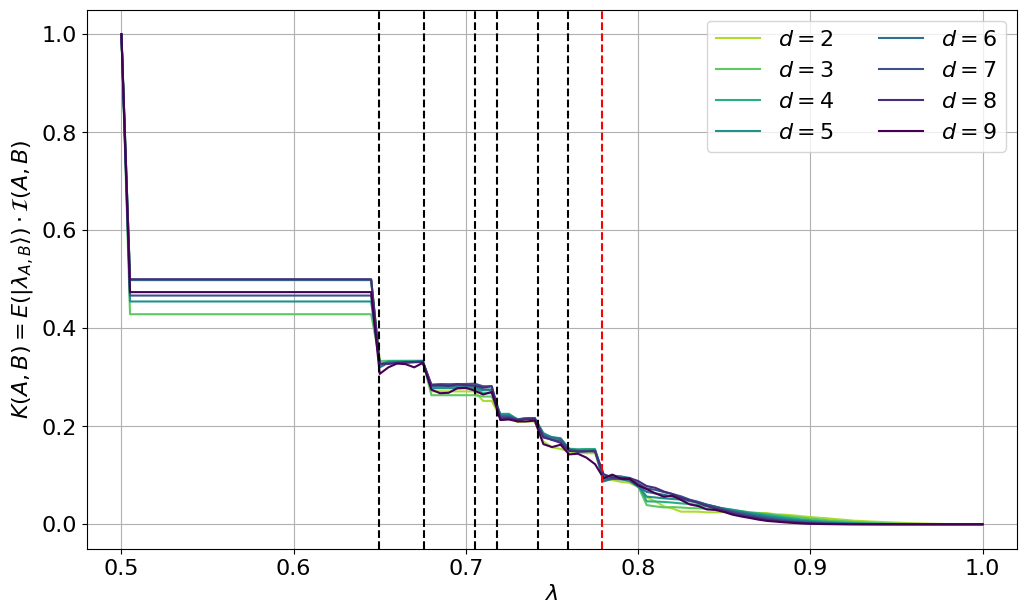

In [21]:
fig, ax = plt.subplots(figsize=(12,7))

lambdas = np.arange(0.5, 1.005, 1/200)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 101
for (i, lambda_) in enumerate(lambdas[:range_]):

    ents[lambda_] = []
    Ns[lambda_] = []

    lambda_str = f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')
    if lambda_ == lambdas[-1]:
        lambda_str = "1.0"
    with open("out_files/{}/mean/{}_{}.out".format(topology, i+1, lambda_str), 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)


NUM_COLORS = len(Ls)
cm = plt.get_cmap('viridis')
ax.set_prop_cycle(color=[cm(k/NUM_COLORS) for k in range(NUM_COLORS)][::-1])

# ax.plot(lambdas[:range], [np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:range]], label="mean")
for d in Ls:
    ax.plot(lambdas[:range_], np.array([((ents[lambda_][d-1])*((d+1)/(Ns[lambda_][d-1]+1))) for lambda_ in lambdas[:range_]]), label='$d = {}$'.format(d+1))#, color='#1f77b4')
    # ax.plot(lambdas[:range], np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')

# ax2.plot(lambdas, np.concatenate([np.array([np.mean([d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:30]]), np.array([np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[30:]])]), label="mean")
# for d in Ls[1:]:
#     ax2.plot(lambdas[:range], np.concatenate([np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:30]]), np.array([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for lambda_ in lambdas[30:range]])]), label='$d = {}$'.format(d))#, color='#1f77b4')

lambda_c = 0.5*(1+np.sqrt(1-np.sqrt(2*(np.sqrt(2)-1))))


ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
# ax.set_yscale('log')
ax.grid(True)
ax.legend(ncol=2)
#ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_ylabel(r'$K(A,B) = E(|\lambda_{A, B}\rangle)\cdot \mathcal{I}(A,B)$')
ax.set_xlim([0.48,1.02])
ax.set_ylim([-0.05,1.05])
ax.grid(True)
if topology == "square_lattice_10" or topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax.axvline(lambda_c, linestyle="dashed", color="red" if topology == "square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S,2D}$')
if topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax.axvline(0.6754005658469, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{S,2D}$')
    ax.axvline(0.7053872803172, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{2S+SS,3D}$')
    ax.axvline(0.7183483467124, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{3S,3D}$')
    ax.axvline(0.7415981879044, linestyle="dashed", color="red" if topology == "diagonal_square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S, 3D}$')
if topology == "fully_connected_honeycomb_6":
    ax.axvline(0.7590630681113, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{4S, 4D}$')
    ax.axvline(0.7790344102223, linestyle="dashed", color="red")#, label=r'$\lambda_{c}^{3S, 4D}$')
# ax.legend()

fig.savefig(dir_ + "/mean_gamma.pdf", format="pdf", bbox_inches="tight")

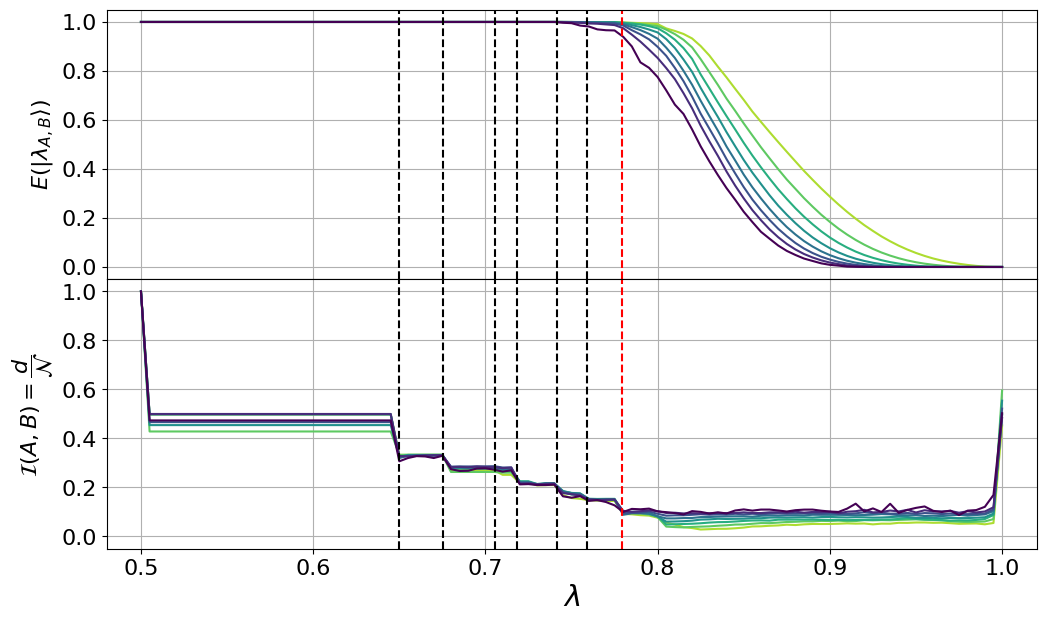

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,7), gridspec_kw={'hspace': 0, 'wspace': 0})

lambdas = np.arange(0.5, 1.005, 1/200)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 101
for (i, lambda_) in enumerate(lambdas[:range_]):
    ents[lambda_] = []
    Ns[lambda_] = []

    lambda_str = f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')
    if lambda_ == lambdas[-1]:
        lambda_str = "1.0"
    with open("out_files/{}/mean/{}_{}.out".format(topology, i+1, lambda_str), 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

NUM_COLORS = len(Ls)
cm = plt.get_cmap('viridis')
ax1.set_prop_cycle(color=[cm(k/NUM_COLORS) for k in range(NUM_COLORS)][::-1])
ax2.set_prop_cycle(color=[cm(k/NUM_COLORS) for k in range(NUM_COLORS)][::-1])

for d in Ls:
    color = ax1._get_lines.get_next_color()  # Get the next color in the cycle
    
    y1 = np.array([ents[lambda_][d-1] for lambda_ in lambdas[:range_]])
    y2 = np.array([(d+1)/(Ns[lambda_][d-1]+1) for lambda_ in lambdas[:range_]])
    
    ax1.plot(lambdas[:range_], y1, color=color, label='$d = {}$'.format(d+1))
    ax2.plot(lambdas[:range_], y2, color=color)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax1.set_ylabel(r'$E(|\lambda_{A, B}\rangle)$')
ax1.set_xlim([0.48,1.02])
ax1.set_ylim([-0.05,1.05])
ax1.grid(True)
if topology == "square_lattice_10" or topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax1.axvline(lambda_c, linestyle="dashed", color="red" if topology == "square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S,2D}$')
if topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax1.axvline(0.6754005658469, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{S,2D}$')
    ax1.axvline(0.7053872803172, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{2S+SS,3D}$')
    ax1.axvline(0.7183483467124, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{3S,3D}$')
    ax1.axvline(0.7415981879044, linestyle="dashed", color="red" if topology == "diagonal_square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S, 3D}$')
if topology == "fully_connected_honeycomb_6":
    ax1.axvline(0.7590630681113, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{4S, 4D}$')
    ax1.axvline(0.7790344102223, linestyle="dashed", color="red")#, label=r'$\lambda_{c}^{3S, 4D}$')
# ax.legend()
ax2.set_xlabel(r'$\lambda$', fontsize=21)
ax2.set_ylabel(r'$\mathcal{I}(A, B) = \dfrac{d}{\mathcal{N}}$')
ax2.set_xlim([0.48,1.02])
ax2.set_ylim([-0.05,1.05])
ax2.grid(True)
if topology == "square_lattice_10" or topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax2.axvline(lambda_c, linestyle="dashed", color="red" if topology == "square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S,2D}$')
if topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax2.axvline(0.6754005658469, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{S,2D}$')
    ax2.axvline(0.7053872803172, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{2S+SS,3D}$')
    ax2.axvline(0.7183483467124, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{3S,3D}$')
    ax2.axvline(0.7415981879044, linestyle="dashed", color="red" if topology == "diagonal_square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S, 3D}$')
if topology == "fully_connected_honeycomb_6":
    ax2.axvline(0.7590630681113, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{4S, 4D}$')
    ax2.axvline(0.7790344102223, linestyle="dashed", color="red")#, label=r'$\lambda_{c}^{3S, 4D}$')
# ax1.legend(ncol=4)


fig.savefig(dir_ + "/mean_ent_integrity.pdf", format="pdf", bbox_inches="tight")

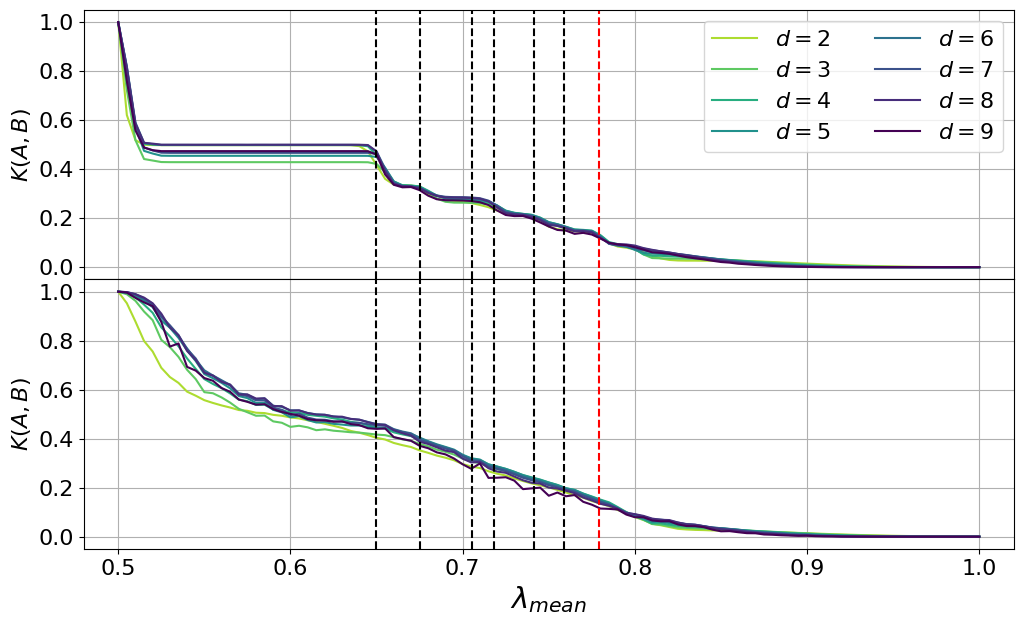

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,7), gridspec_kw={'hspace': 0, 'wspace': 0})
# fig2, ax2 = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/200)
n_samples = 10

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 101
for (i, lambda_) in enumerate(lambdas[:range_]):

    ents[lambda_] = []
    Ns[lambda_] = []

    lambda_str = f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')
    if lambda_ == lambdas[-1]:
        lambda_str = "1.0"
    
    ents_per_sample = {}
    Ns_per_sample = {}
    for sample in np.arange(1, n_samples+1):
        ents_per_sample[sample] = []
        Ns_per_sample[sample] = []
        with open("out_files/{}/std_dev=0.01/{}/{}_{}.out".format(topology, sample, i+1, lambda_str), 'r') as file:
            for line in file:
                tokens = line.split()
                L, ent, N = map(float, tokens)

                if i == 0 and sample == 1:
                    Ls.append(int(L))

                ents_per_sample[sample].append(ent)
                Ns_per_sample[sample].append(N)


    ents[lambda_] = [sum(values) / len(values) for values in zip(*ents_per_sample.values())]
    Ns[lambda_] = [sum(values) / len(values) for values in zip(*Ns_per_sample.values())]


NUM_COLORS = len(Ls)
cm = plt.get_cmap('viridis')
ax1.set_prop_cycle(color=[cm(k/NUM_COLORS) for k in range(NUM_COLORS)][::-1])
ax2.set_prop_cycle(color=[cm(k/NUM_COLORS) for k in range(NUM_COLORS)][::-1])

for d in Ls:
    ax1.plot(lambdas[:range_], np.array([((ents[lambda_][d-1])*((d+1)/(Ns[lambda_][d-1]+1))) for lambda_ in lambdas[:range_]]), label='$d = {}$'.format(d+1))#, color='#1f77b4')

lambda_c = 0.5*(1+np.sqrt(1-np.sqrt(2*(np.sqrt(2)-1))))


# ax.set_yscale('log')
ax1.grid(True)
# ax.legend()
#ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])



lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax1.set_ylabel(r'$K(A,B)$')
ax1.set_xlim([0.48,1.02])
ax1.set_ylim([-0.05,1.05])
ax1.grid(True)
if topology == "square_lattice_10" or topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax1.axvline(lambda_c, linestyle="dashed", color="red" if topology == "square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S,2D}$')
if topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax1.axvline(0.6754005658469, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{S,2D}$')
    ax1.axvline(0.7053872803172, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{2S+SS,3D}$')
    ax1.axvline(0.7183483467124, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{3S,3D}$')
    ax1.axvline(0.7415981879044, linestyle="dashed", color="red" if topology == "diagonal_square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S, 3D}$')
if topology == "fully_connected_honeycomb_6":
    ax1.axvline(0.7590630681113, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{4S, 4D}$')
    ax1.axvline(0.7790344102223, linestyle="dashed", color="red")#, label=r'$\lambda_{c}^{3S, 4D}$')
# ax.legend()


ents = {}
Ns = {}
Ls = []

n = 6
range_ = 101
for (i, lambda_) in enumerate(lambdas[:range_]):

    ents[lambda_] = []
    Ns[lambda_] = []

    lambda_str = f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')
    if lambda_ == lambdas[-1]:
        lambda_str = "1.0"
    
    ents_per_sample = {}
    Ns_per_sample = {}
    for sample in np.arange(1, n_samples+1):
        ents_per_sample[sample] = []
        Ns_per_sample[sample] = []
        with open("out_files/{}/std_dev=0.07/{}/{}_{}.out".format(topology, sample, i+1, lambda_str), 'r') as file:
            for line in file:
                tokens = line.split()
                L, ent, N = map(float, tokens)

                if i == 0 and sample == 1:
                    Ls.append(int(L))

                ents_per_sample[sample].append(ent)
                Ns_per_sample[sample].append(N)


    ents[lambda_] = [sum(values) / len(values) for values in zip(*ents_per_sample.values())]
    Ns[lambda_] = [sum(values) / len(values) for values in zip(*Ns_per_sample.values())]


for d in Ls:
    ax2.plot(lambdas[:range_], np.array([((ents[lambda_][d-1])*((d+1)/(Ns[lambda_][d-1]+1))) for lambda_ in lambdas[:range_]]), label='$d = {}$'.format(d+1))#, color='#1f77b4')

lambda_c = 0.5*(1+np.sqrt(1-np.sqrt(2*(np.sqrt(2)-1))))

ax2.set_xlabel(r'$\lambda_{mean}$')
# ax.set_yscale('log')
ax2.grid(True)
#ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])



lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax2.set_xlabel(r'$\lambda_{mean}$', fontsize=21)
ax2.set_ylabel(r'$K(A,B)$')
ax2.set_xlim([0.48,1.02])
ax2.set_ylim([-0.05,1.05])
ax2.grid(True)
if topology == "square_lattice_10" or topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax2.axvline(lambda_c, linestyle="dashed", color="red" if topology == "square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S,2D}$')
if topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax2.axvline(0.6754005658469, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{S,2D}$')
    ax2.axvline(0.7053872803172, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{2S+SS,3D}$')
    ax2.axvline(0.7183483467124, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{3S,3D}$')
    ax2.axvline(0.7415981879044, linestyle="dashed", color="red" if topology == "diagonal_square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S, 3D}$')
if topology == "fully_connected_honeycomb_6":
    ax2.axvline(0.7590630681113, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{4S, 4D}$')
    ax2.axvline(0.7790344102223, linestyle="dashed", color="red")#, label=r'$\lambda_{c}^{3S, 4D}$')
ax1.legend(ncols=2)
# ax.legend()



fig.savefig(dir_ + "/std_gamma.pdf", format="pdf", bbox_inches="tight")

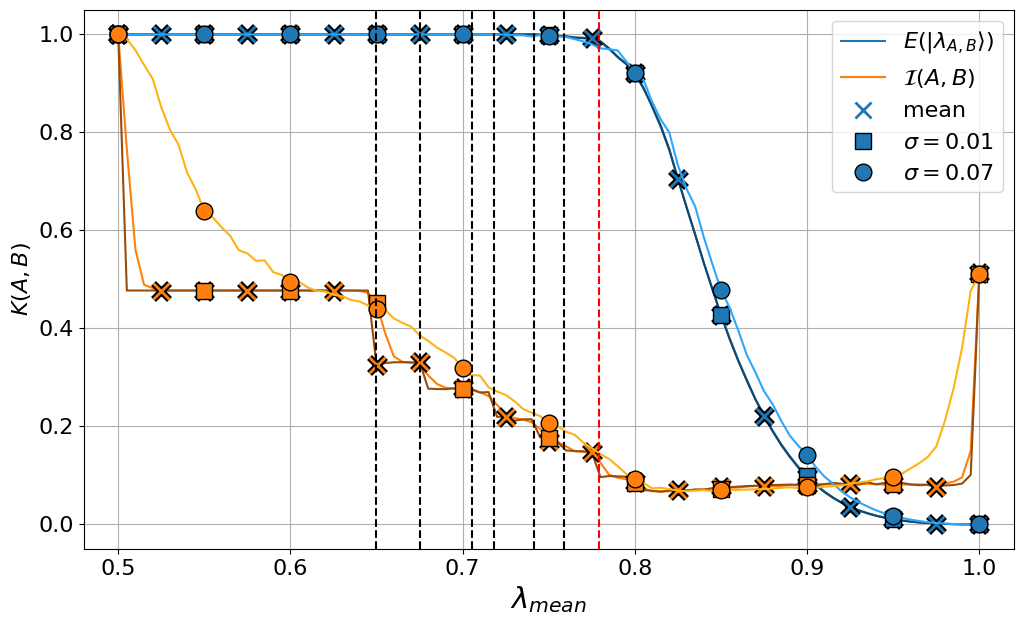

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
# fig2, ax2 = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/200)
n_samples = 10

ents_mean = {}
Ns_mean = {}
Ls = []

ents_std1 = {}
Ns_std1 = {}

ents_std2 = {}
Ns_std2 = {}

n = 6
range_ = 101
for (i, lambda_) in enumerate(lambdas[:range_]):

    ents_mean[lambda_] = []
    Ns_mean[lambda_] = []

    lambda_str = f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')
    if lambda_ == lambdas[-1]:
        lambda_str = "1.0"
    with open("out_files/{}/mean/{}_{}.out".format(topology, i+1, lambda_str), 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents_mean[lambda_].append(ent)
            Ns_mean[lambda_].append(N)

for (i, lambda_) in enumerate(lambdas[:range_]):

    ents_std1[lambda_] = []
    Ns_std1[lambda_] = []

    lambda_str = f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')
    if lambda_ == lambdas[-1]:
        lambda_str = "1.0"
    
    ents_per_sample = {}
    Ns_per_sample = {}
    for sample in np.arange(1, n_samples+1):
        ents_per_sample[sample] = []
        Ns_per_sample[sample] = []
        with open("out_files/{}/std_dev=0.01/{}/{}_{}.out".format(topology, sample, i+1, lambda_str), 'r') as file:
            for line in file:
                tokens = line.split()
                L, ent, N = map(float, tokens)

                ents_per_sample[sample].append(ent)
                Ns_per_sample[sample].append(N)


    ents_std1[lambda_] = [sum(values) / len(values) for values in zip(*ents_per_sample.values())]
    Ns_std1[lambda_] = [sum(values) / len(values) for values in zip(*Ns_per_sample.values())]

for (i, lambda_) in enumerate(lambdas[:range_]):

    ents_std2[lambda_] = []
    Ns_std2[lambda_] = []

    lambda_str = f"{lambdas[i]:.3f}".rstrip('0').rstrip('.')
    if lambda_ == lambdas[-1]:
        lambda_str = "1.0"
    
    ents_per_sample = {}
    Ns_per_sample = {}
    for sample in np.arange(1, n_samples+1):
        ents_per_sample[sample] = []
        Ns_per_sample[sample] = []
        with open("out_files/{}/std_dev=0.07/{}/{}_{}.out".format(topology, sample, i+1, lambda_str), 'r') as file:
            for line in file:
                tokens = line.split()
                L, ent, N = map(float, tokens)

                ents_per_sample[sample].append(ent)
                Ns_per_sample[sample].append(N)


    ents_std2[lambda_] = [sum(values) / len(values) for values in zip(*ents_per_sample.values())]
    Ns_std2[lambda_] = [sum(values) / len(values) for values in zip(*Ns_per_sample.values())]

y1_mean = np.array([np.mean(np.array(ents_mean[lambda_])) for lambda_ in lambdas[:range_]])
y2_mean = np.array([np.mean((np.array(Ls)+1)/(np.array(Ns_mean[lambda_])+1)) for lambda_ in lambdas[:range_]])

marker_indices_mean = np.arange(0, len(lambdas[:range_]), 5)

y1_std1 = np.array([np.mean(np.array(ents_std1[lambda_])) for lambda_ in lambdas[:range_]])
y2_std1 = np.array([np.mean((np.array(Ls)+1)/(np.array(Ns_std1[lambda_])+1)) for lambda_ in lambdas[:range_]])

marker_indices_std1 = np.arange(0, len(lambdas[:range_]), 10)

ax.plot(lambdas[:range_], y1_std1, color='#1f77b4', label=r"$E(|\lambda_{A, B}\rangle)$")
ax.plot(lambdas[:range_], y2_std1, color='#ff7f0e', label=r"$\mathcal{I}(A,B)$")
ax.plot(lambdas[:range_], y2_mean, color='#994c08')
ax.plot([lambdas[i] for i in marker_indices_mean], [y2_mean[i] for i in marker_indices_mean], 
        color='#ff7f0e', marker='x', markersize=12, markeredgecolor='black', markeredgewidth='5', linestyle='', label=None)
ax.plot([lambdas[i] for i in marker_indices_mean], [y2_mean[i] for i in marker_indices_mean], 
        color='#ff7f0e', marker='x', markersize=12, markeredgecolor='#ff7f0e', markeredgewidth='2', linestyle='', label=None)

ax.plot(lambdas[:range_], y1_mean, color='#13476c')
ax.plot([lambdas[i] for i in marker_indices_mean], [y1_mean[i] for i in marker_indices_mean], 
        color='#1f77b4', marker='x', markersize=12, markeredgecolor='black', markeredgewidth='5', linestyle='', label=None)
ax.plot([lambdas[i] for i in marker_indices_mean], [y1_mean[i] for i in marker_indices_mean], 
        color='#1f77b4', marker='x', markersize=12, markeredgecolor='#1f77b4', markeredgewidth='2', linestyle='', label="mean")
ax.plot([lambdas[i] for i in marker_indices_std1], [y1_std1[i] for i in marker_indices_std1], 
        color='#1f77b4', marker='s', markersize=12, markeredgecolor='black', linestyle='', label=r"$\sigma=0.01$")


ax.plot([lambdas[i] for i in marker_indices_std1], [y2_std1[i] for i in marker_indices_std1], 
        color='#ff7f0e', marker='s', markersize=12, markeredgecolor='black', linestyle='', label=None)

y1_std2 = np.array([np.mean(np.array(ents_std2[lambda_])) for lambda_ in lambdas[:range_]])
y2_std2 = np.array([np.mean((np.array(Ls)+1)/(np.array(Ns_std2[lambda_])+1)) for lambda_ in lambdas[:range_]])

ax.plot(lambdas[:range_], y1_std2, color='#2ba7fc')
ax.plot([lambdas[i] for i in marker_indices_std1], [y1_std2[i] for i in marker_indices_std1], 
        color='#1f77b4', marker='o', markersize=12, markeredgecolor='black', linestyle='', label=r"$\sigma=0.07$")

ax.plot(lambdas[:range_], y2_std2, color='#ffb214')
ax.plot([lambdas[i] for i in marker_indices_std1], [y2_std2[i] for i in marker_indices_std1], 
        color='#ff7f0e', marker='o', markersize=12, markeredgecolor='black', linestyle='', label=None)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_xlabel(r'$\lambda_{mean}$', fontsize=21)
ax.set_ylabel(r'$K(A,B)$')
# ax.set_ylabel(r'$\Gamma = \dfrac{E(\lambda)d}{\mathcal{N}}$')
ax.set_xlim([0.48,1.02])
ax.set_ylim([-0.05,1.05])
ax.grid(True)
if topology == "square_lattice_10" or topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax.axvline(lambda_c, linestyle="dashed", color="red" if topology == "square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S,2D}$')
if topology == "diagonal_square_lattice_10" or topology == "fully_connected_honeycomb_6":
    ax.axvline(0.6754005658469, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{S,2D}$')
    ax.axvline(0.7053872803172, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{2S+SS,3D}$')
    ax.axvline(0.7183483467124, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{3S,3D}$')
    ax.axvline(0.7415981879044, linestyle="dashed", color="red" if topology == "diagonal_square_lattice_10" else "black")#, label=r'$\lambda_{c}^{2S, 3D}$')
if topology == "fully_connected_honeycomb_6":
    ax.axvline(0.7590630681113, linestyle="dashed", color="black")#, label=r'$\lambda_{c}^{4S, 4D}$')
    ax.axvline(0.7790344102223, linestyle="dashed", color="red")#, label=r'$\lambda_{c}^{3S, 4D}$')
# ax.legend()
ax.legend()

fig.savefig(dir_ + "/comparison.pdf", format="pdf", bbox_inches="tight")